In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import xgboost
import sys
sys.path.append("./skynet/bf/src/scripts/")
import xgboost_ohlc
import utils
import numpy as np
import seaborn as sns
import talib
import datetime
import requests
import time
%matplotlib inline

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)

In [2]:
version = '2000'
five = pd.read_csv('skynet/bf/data/processed/min_five.csv')
data_columns = ['MACDS/O','UP','FirstUP','C/O','C-1/C','H/O','L/O']
target_column = 'Target_UP'
backtest_columns = ['timestamp','Target_Close','Target_Open']
data_size = 5000
test = 0.2
test_size = data_size*test
test_size = 1000

In [ ]:
five = pd.read_csv('skynet/bf/data/processed/min_five.csv')
data_columns = ['MACDS/O','UP','FirstUP','C/O','C-1/C','H/O','L/O','TIme']
target_column = 'Target_UP'
backtest_columns = ['timestamp','Target_Close','Target_Open']

five_for_ml = five[data_columns+[target_column]+backtest_columns].dropna()
train = five_for_ml[-data_size:-test_size]
test = five_for_ml[-test_size:]
backtest = five_for_ml[-test_size:]
all_data = five_for_ml[-data_size:]
print(five_for_ml['timestamp'].values[0])
print(five_for_ml['timestamp'].values[-1])


data_train = train[data_columns]
data_test = test[data_columns]


target_train = train[target_column]
target_test = test[target_column]


xgbc = xgboost_ohlc.c_fit(data_train, target_train)

predict = xgbc.predict(data_test)
result = (predict == target_test)
print(result.mean())

xgbc_all_data = xgboost_ohlc.c_fit(all_data[data_columns],all_data[target_column])
train.to_csv("skynet/bf/model/T_"+version+"/train.csv")
test.to_csv("skynet/bf/model/T_"+version+"/test.csv")
backtest.to_csv("skynet/bf/model/T_"+version+"/backtest.csv")
pickle.dump(xgbc_all_data, open("skynet/bf/model/T_"+version+"/xgbc.pickle", "wb"))
with open("skynet/bf/model/T_"+version+"/spec.txt", mode="w") as txt:
    txt.write(str(datetime.datetime.now())+'\n')
    txt.write('data_columns: '+str(data_columns)+"\n")
    txt.write('target_column: '+str(target_column)+"\n")
    txt.write('simplescore: '+str(result.mean())+"\n")

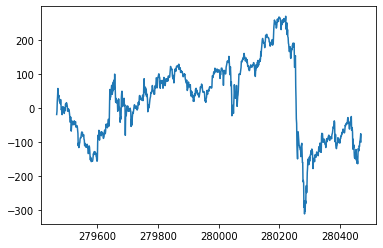

In [4]:
plt.plot((0.01*predict*(backtest['Target_Close']-backtest['Target_Open'])).cumsum())

In [ ]:
#########################################
#########################################
#########################################

In [8]:
(predict == target_test).mean()

0.515

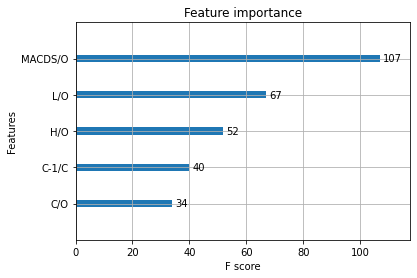

In [5]:
xgboost.plot_importance(xgbc)

In [14]:
ttt = five[['UP','FirstUP','Close']].dropna()[20000:]

In [18]:
(ttt['UP'] == ttt['FirstUP']).mean()

0.6279785582426409

In [19]:
ttt

,UP,FirstUP,Close
20375,1,-1.0,43598.0
20376,-1,-1.0,43570.0
20377,-1,1.0,43560.0
20378,1,-1.0,43582.5
20379,1,-1.0,43591.0
...,...,...,...
280465,1,1.0,929030.0
280466,-1,-1.0,927500.0
280467,1,1.0,927702.0
280468,-1,1.0,926932.0
